## Predecting house price 

In this project we will try to predict house prices based on some different features

## Importing libaries and the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('data_houses.csv')

## let's make some EDA on the dataset to explore the features more 

In [8]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
#let's discover the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [11]:
# statistics
data.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


In [13]:
# let's check for null values 
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

As shown above our data set has no missing values 

C:\Users\21652\AppData\Local\Temp\ipykernel_29896\2863976909.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

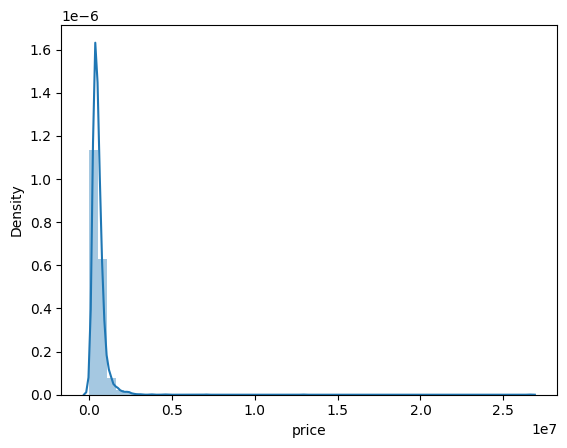

In [14]:
# let's plot the price distrubution 
sns.distplot(data['price'])

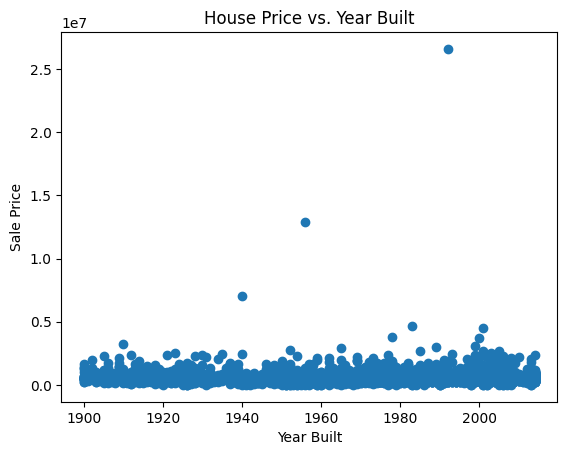

In [15]:
#let's plot the price aginst the year of build
plt.scatter(data['yr_built'], data['price'])
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('House Price vs. Year Built')
plt.show()

In [19]:
data['yr_built'].value_counts()

yr_built
2006    111
2005    104
2007     93
2004     92
1978     90
       ... 
1915      6
1935      6
1933      5
1934      4
1936      3
Name: count, Length: 115, dtype: int64

In [23]:
data['price'].max()

26590000.0

In [24]:
#seeing the colmun where the price is max
data[data['price']==26590000.0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA


As shown the most expensive house in this data set was built in the 1992 with the sqft_Above equal to 1180 with 3 bedrooms

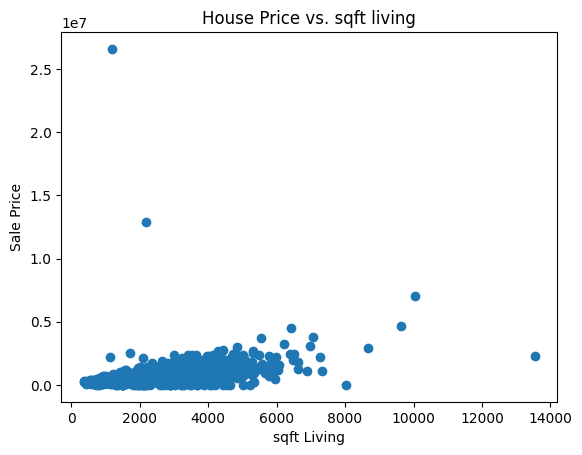

In [25]:
plt.scatter(data['sqft_living'], data['price'])
plt.xlabel('sqft Living')
plt.ylabel('Sale Price')
plt.title('House Price vs. sqft living')
plt.show()

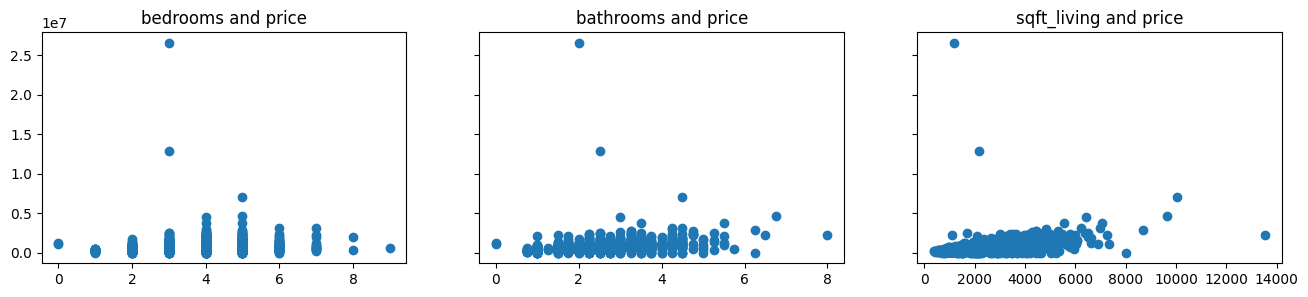

In [29]:
#now plotting the features against  the price 
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize= (16,3))
ax1.scatter(data['bedrooms'],data['price'] )
ax1.set_title('bedrooms and price')
ax2.scatter(data['bathrooms'], data['price'])
ax2.set_title('bathrooms and price')
ax3.scatter(data['sqft_living'], data['price'])
ax3.set_title('sqft_living and price')
plt.show()

In [28]:
data['log_price']=np.log(data['price'])

C:\Users\21652\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


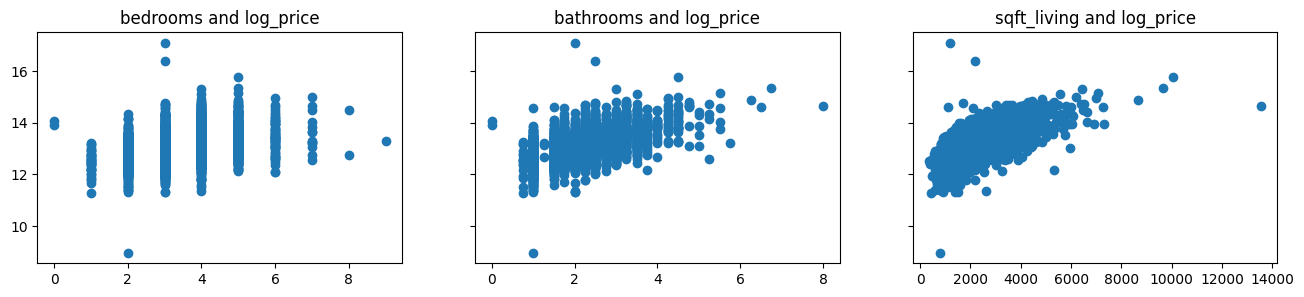

In [30]:
#now plotting the features against the log of the price 
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize= (16,3))
ax1.scatter(data['bedrooms'],data['log_price'] )
ax1.set_title('bedrooms and log_price')
ax2.scatter(data['bathrooms'], data['log_price'])
ax2.set_title('bathrooms and log_price')
ax3.scatter(data['sqft_living'], data['log_price'])
ax3.set_title('sqft_living and log_price')
plt.show()

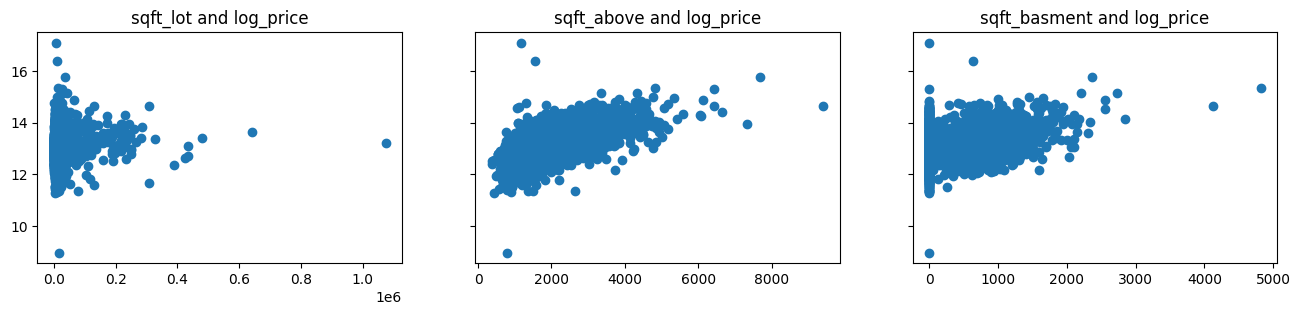

In [31]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize= (16,3))
ax1.scatter(data['sqft_lot'],data['log_price'] )
ax1.set_title('sqft_lot and log_price')
ax2.scatter(data['sqft_above'], data['log_price'])
ax2.set_title('sqft_above and log_price')
ax3.scatter(data['sqft_basement'], data['log_price'])
ax3.set_title('sqft_basment and log_price')
plt.show()

ValueError: supplied range of [-inf, 17.0960457632192] is not finite

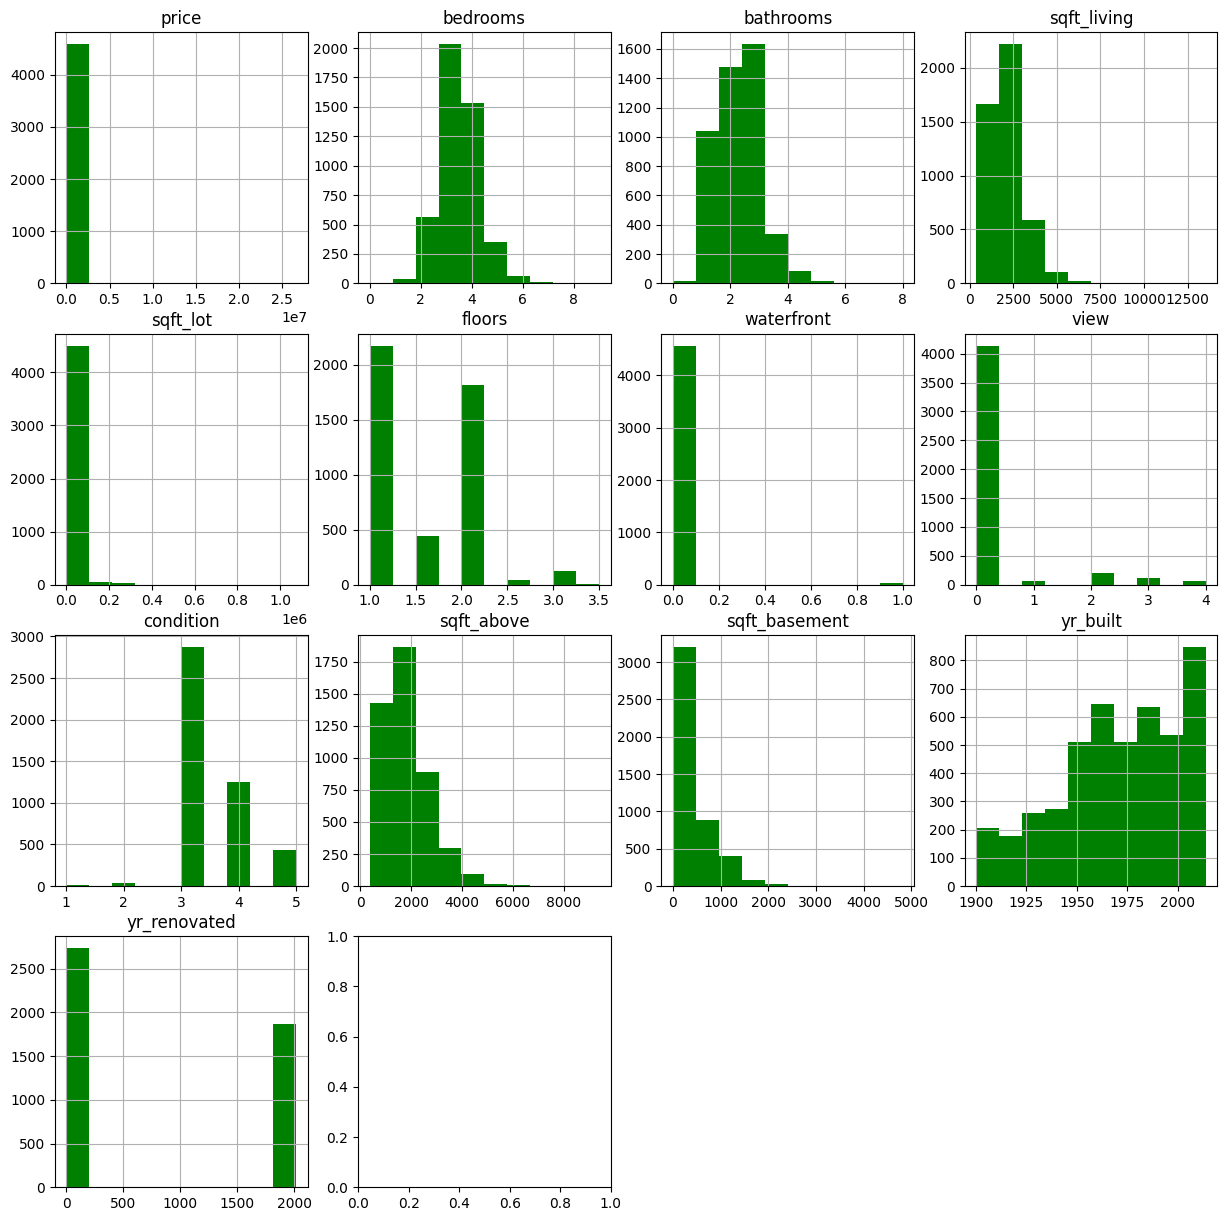

In [32]:
data.hist(figsize=(15, 15), xlabelsize=10, ylabelsize=10,color='green');

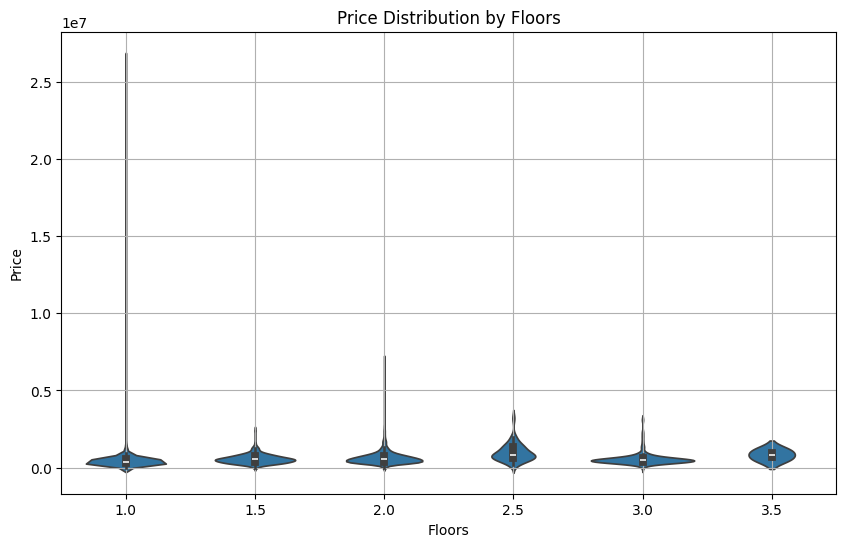

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='floors', y='price', data=data)
plt.title('Price Distribution by Floors')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [34]:
#dropping the unncessary columns
df1=data.drop(['date','street','city','statezip','country'],axis='columns')
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,log_price
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,12.653958
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,14.684290
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,12.742566
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,12.948010
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,13.217674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,12.638396
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,13.188775
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,12.940612
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,12.222930


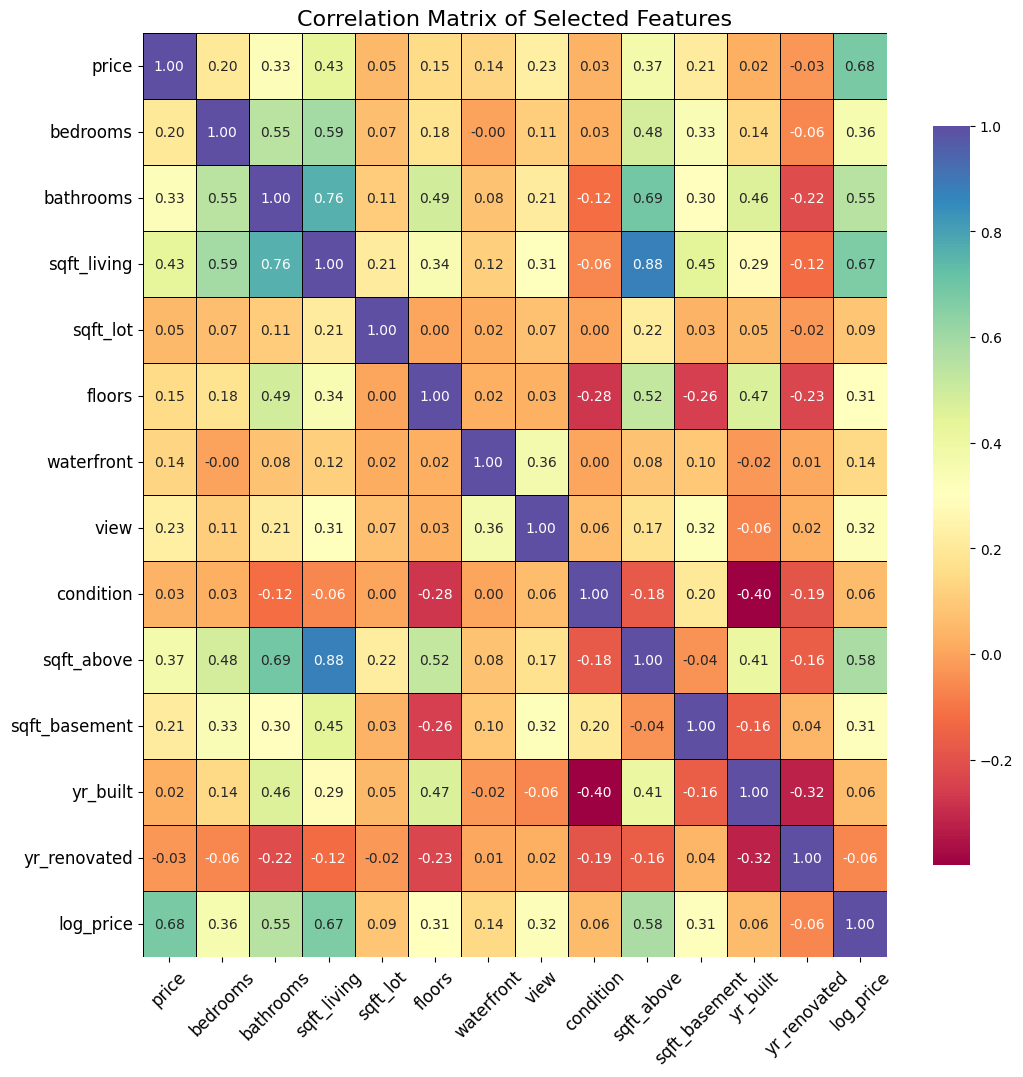

In [35]:
#plotting the coorelation matrix to see wchic feature is best to predict the price
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df1.corr(method="pearson")

# Set up the matplotlib figure
plt.figure(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Spectral', cbar_kws={'shrink': .8}, 
            linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Customize the plot
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.show()

In [36]:
df2=corr_matrix.index[abs(corr_matrix['price'])>=0.3].tolist()
df2.remove('price')   
print(df2)

['bathrooms', 'sqft_living', 'sqft_above', 'log_price']


In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
y=data['price']
x=data[['bathrooms', 'sqft_living', 'sqft_above']]
scaler = StandardScaler() 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [42]:
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)
y_test_pred_lr=linear_regression.predict(x_test)
linear_regression_acc=r2_score(y_test,y_test_pred_lr)
print(f'Linear Regression Test accuracy: {linear_regression_acc}')

Linear Regression Test accuracy: 0.4202744301865343


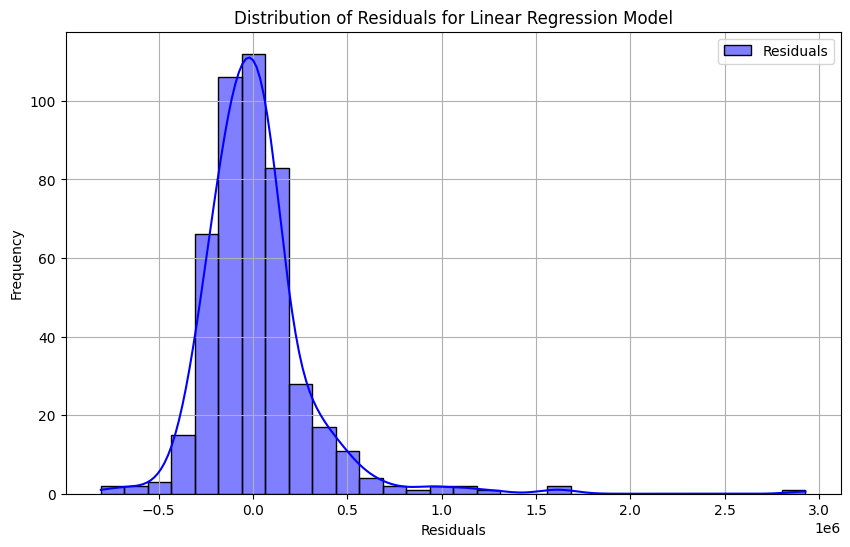

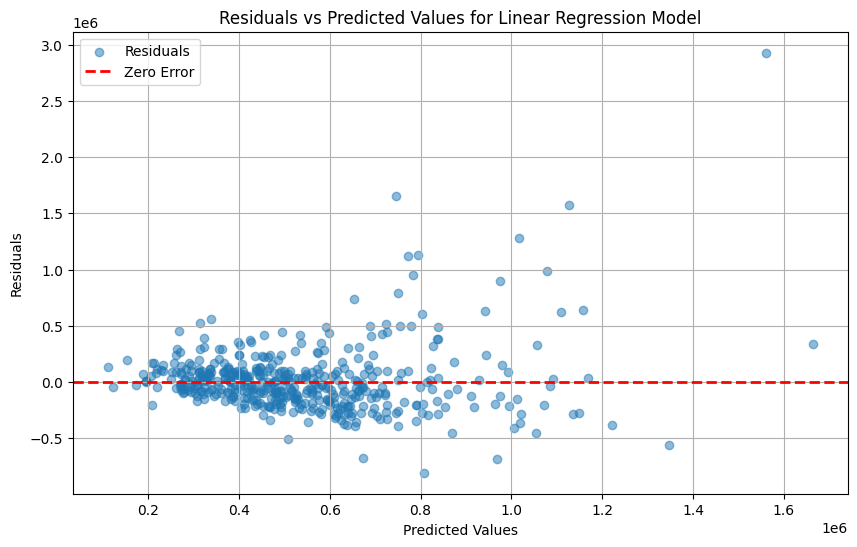

In [43]:
residuals = y_test - y_test_pred_lr

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30, label='Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals for Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_lr, residuals, alpha=0.5, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Linear Regression Model')
plt.legend()
plt.grid(True)